# IPL Dataset Analysis (2008 - 2017)

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [14]:
plt.style.use("ggplot")

In [4]:
df =pd.read_csv("deliveries.csv")

In [5]:
df.shape

(150460, 21)

In [6]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [8]:
matches = pd.read_csv("matches.csv")
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [9]:
matches["id"].nunique()

636

In [10]:
df["match_id"].nunique()

636

In [11]:
new = df.merge(matches, left_on = "match_id", right_on = "id")

In [12]:
new.shape

(150460, 39)

In [19]:
df.shape

(150460, 21)

In [23]:
new.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder', 'id', 'season', 'city', 'date', 'team1',
       'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied',
       'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue',
       'umpire1', 'umpire2', 'umpire3'],
      dtype='object')

In [26]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

## Total matches won by each ipl team 

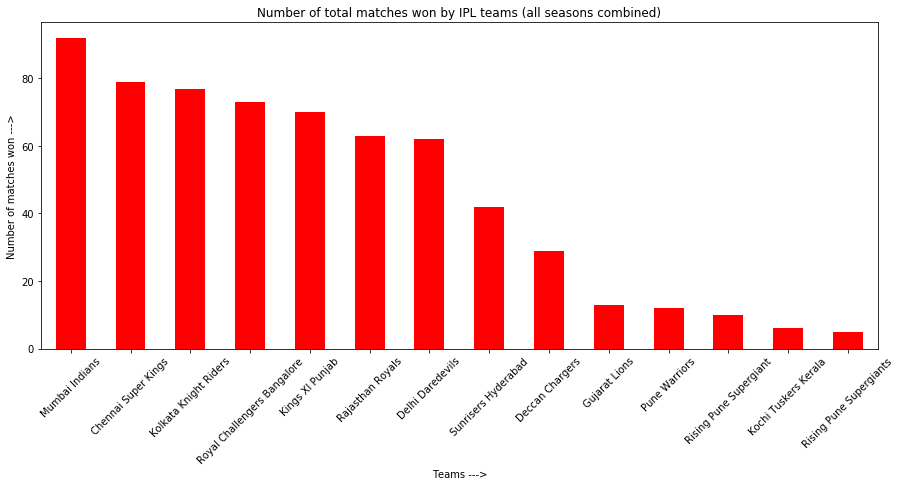

In [32]:
matches["winner"].value_counts().plot(kind = "bar",color = "red", figsize = (15,6))
plt.xticks(rotation = 45)
plt.xlabel("Teams --->")
plt.ylabel("Number of matches won --->")
plt.title("Number of total matches won by IPL teams (all seasons combined)")
plt.show()

In [20]:
plt.style.use("ggplot")

In [127]:
%matplotlib notebook

In [41]:
matches["id"].nunique()

636

## IPL season winners 

In [62]:
print("Winning teams of IPL:\n")
print("Year   Team\n")
for year in range(2008,2018):
    print(year,end="   ")
    print(matches[matches["season"]==year].tail(1)["winner"].values[0])

Winning teams of IPL:

Year   Team

2008   Rajasthan Royals
2009   Deccan Chargers
2010   Chennai Super Kings
2011   Chennai Super Kings
2012   Kolkata Knight Riders
2013   Mumbai Indians
2014   Kolkata Knight Riders
2015   Mumbai Indians
2016   Sunrisers Hyderabad
2017   Mumbai Indians


In [13]:
ipl_2017 = new[new["season"]==2017]

## Top run scorers in IPL-2017 

In [129]:
%matplotlib notebook

<IPython.core.display.Javascript object>


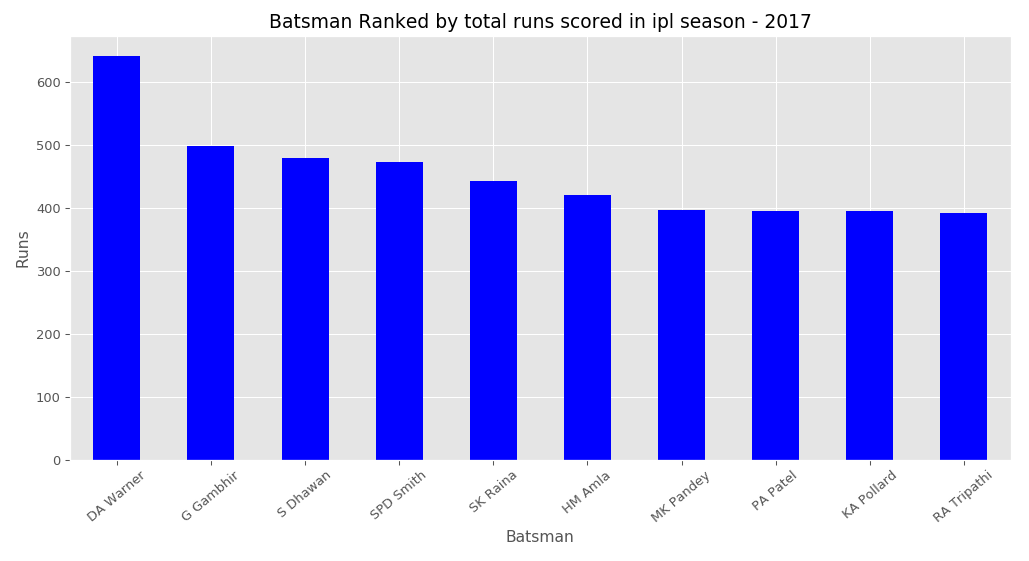

In [130]:
ipl_2017.groupby("batsman").sum()["batsman_runs"].sort_values(ascending = False).head(10).plot(kind = "bar",color = "blue", figsize = (11,6))
plt.xlabel("Batsman")
plt.ylabel("Runs")
plt.title("Batsman Ranked by total runs scored in ipl season - 2017")
plt.xticks(rotation =40)
plt.tight_layout()
plt.show()


In [111]:
min_bowls = 13*3*6

In [112]:
min_bowls

234

In [119]:
ipl_2017["b"] = 1

C:\Users\Sritiman Adak\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [120]:
best_bowlers = ipl_2017.groupby("bowler").sum()[["total_runs","b"]]

In [121]:
best_bowlers = best_bowlers[best_bowlers["b"] >= min_bowls]

In [122]:
best_bowlers.shape

(24, 2)

In [123]:
best_bowlers["Economy"]= (best_bowlers["total_runs"]/best_bowlers["b"])*6

## Best bowlers of IPL 2017 by Economy

<IPython.core.display.Javascript object>


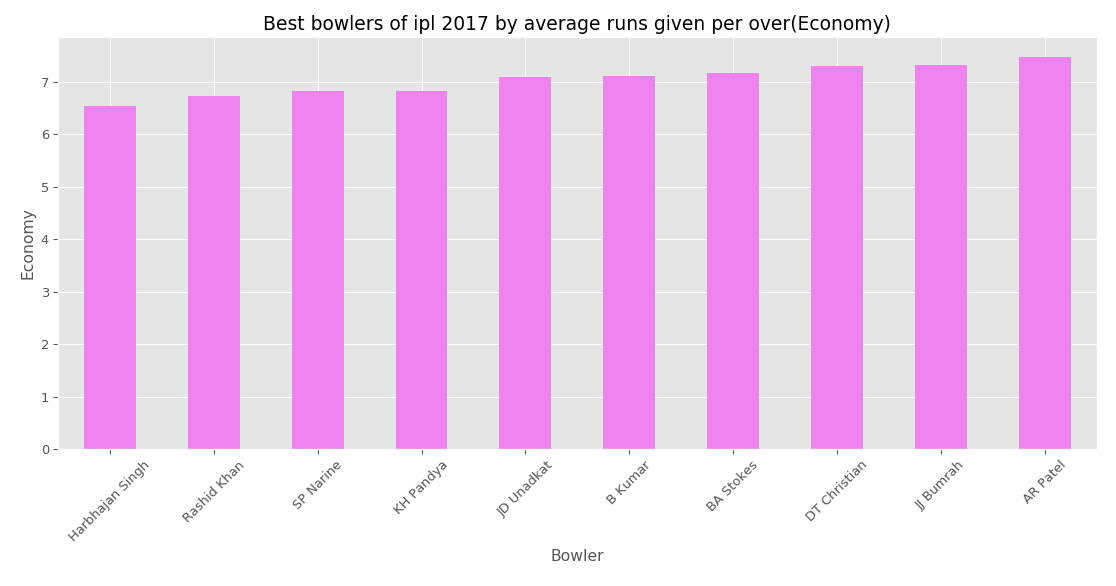

In [132]:
best_bowlers.sort_values("Economy", ascending=True)["Economy"].head(10).plot(kind = "bar", color = "violet", figsize = (11,6))
plt.xlabel("Bowler")
plt.ylabel("Economy")
plt.title("Best bowlers of ipl 2017 by average runs given per over(Economy)")
plt.xticks(rotation =45)
plt.tight_layout()
plt.show()

In [7]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [8]:
df["dismissal_kind"].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [47]:
diss = ['caught', 'bowled',"lbw",'caught and bowled',"stumped","hit wicket"]

In [48]:
wicket = df[df["dismissal_kind"].isin(diss)][["bowler","dismissal_kind"]]

In [49]:
wicket.shape

(6673, 2)

In [50]:
%matplotlib notebook

## Highest wicket takers in ipl 

<IPython.core.display.Javascript object>


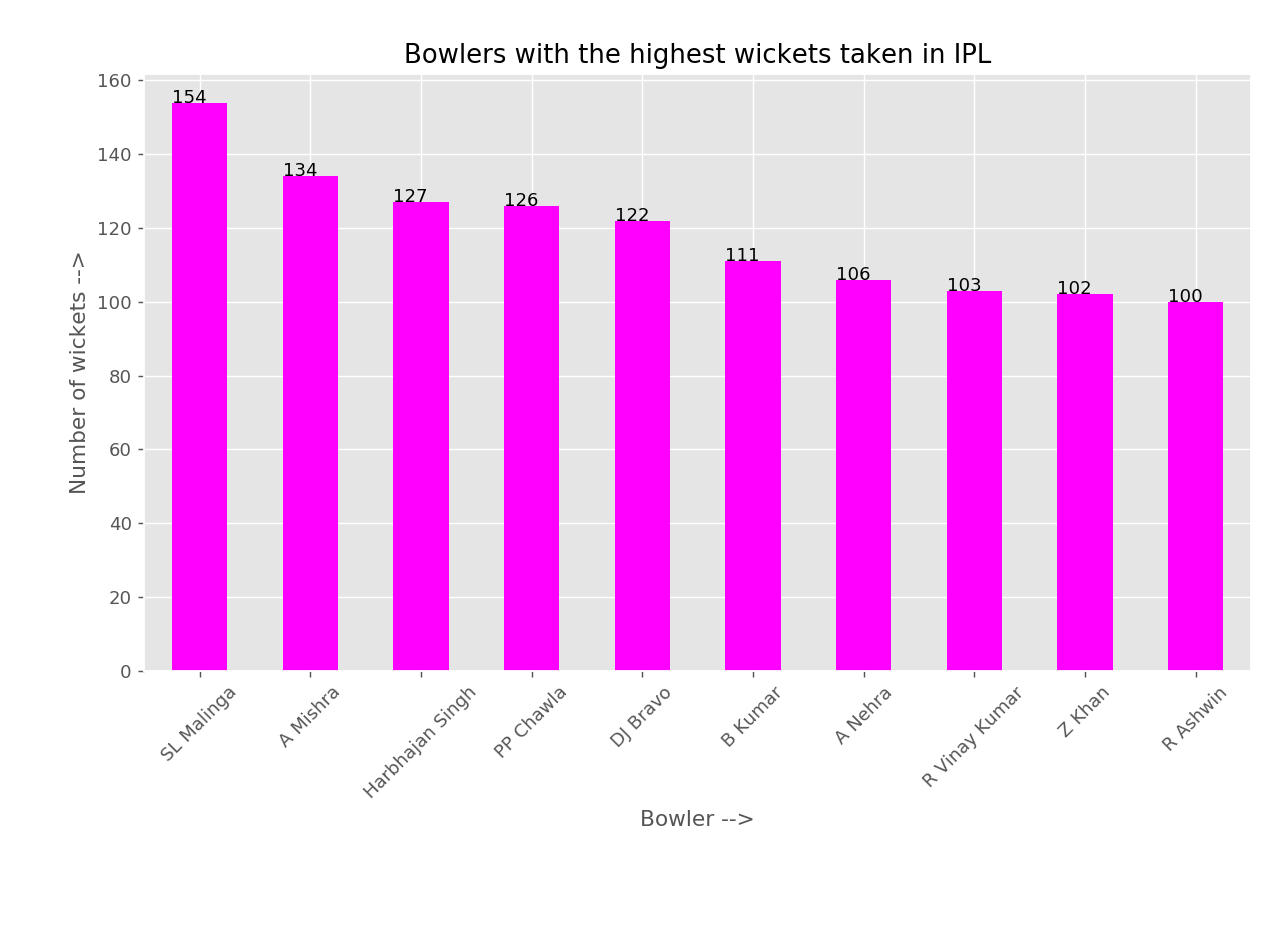

In [55]:
wicket["bowler"].value_counts().sort_values(ascending = False).head(10).plot(kind = "bar",color = "magenta")
for i,v in enumerate(wicket["bowler"].value_counts().sort_values(ascending = False).head(10).values):
    plt.text(i-0.25,v, str(v))
plt.xlabel("Bowler -->")
plt.ylabel("Number of wickets -->")
plt.title("Bowlers with the highest wickets taken in IPL")
plt.xticks(rotation =45)
plt.tight_layout()
plt.show()

In [42]:
df.shape

(150460, 21)

In [43]:
new.shape

(150460, 39)

In [51]:
matches.shape

(636, 18)

In [50]:
matches[matches["toss_winner"] == matches["winner"]].shape

(325, 18)

In [52]:
matches[matches["toss_winner"] != matches["winner"]].shape

(311, 18)

In [54]:
tw = ["toss winners","toss losers"]
w = [325,311]

## Probability of winning a match 

<IPython.core.display.Javascript object>


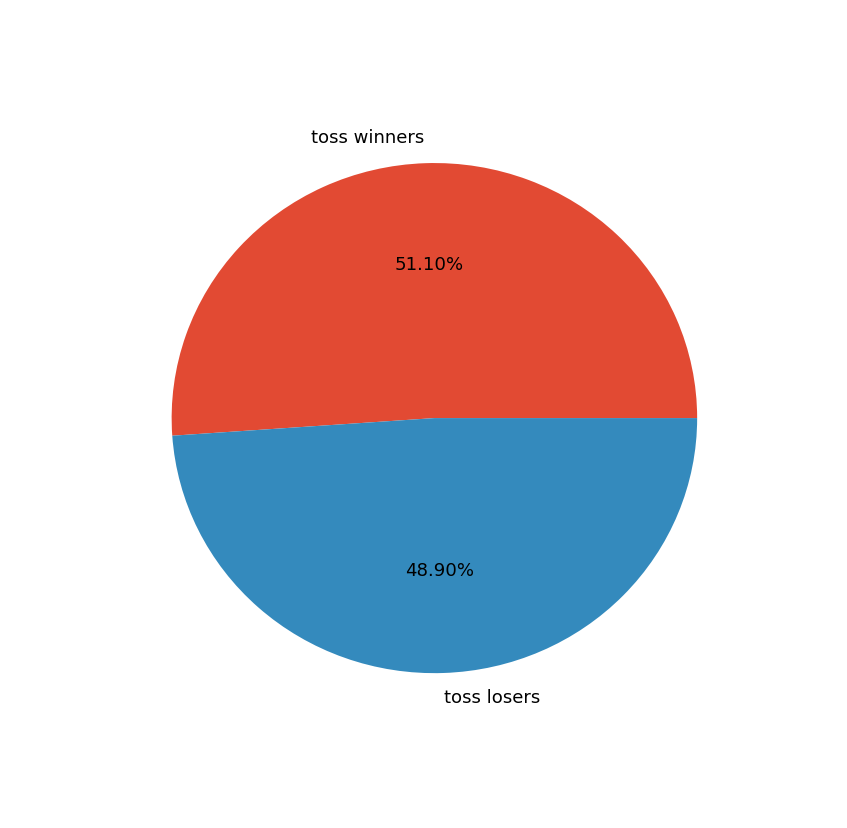

In [61]:
plt.pie([325,311],labels = tw, autopct = "%.2f%%")
plt.title("Probability of winning a match")
plt.show()

## Probability of winning by toss decision 

<IPython.core.display.Javascript object>


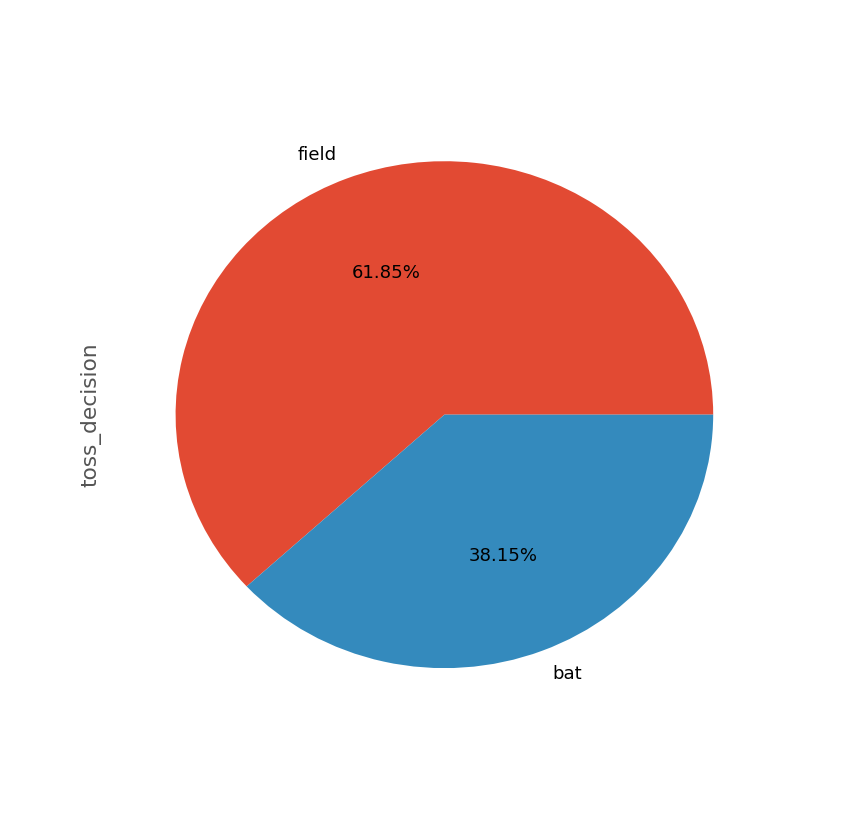

In [65]:
matches[matches["toss_winner"] == matches["winner"]]["toss_decision"].value_counts().plot(kind = "pie", autopct = "%.2f%%")

In [82]:
new["batting_team"].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [88]:
mi = new[new["season"]== 2017]

In [89]:
mi = mi[mi["batting_team"]=='Mumbai Indians']

In [96]:
mi.shape

(2053, 39)

In [97]:
mi = mi[mi["inning"].isin([1,2])]

In [103]:
mi["match_id"].unique()

array([ 2,  7, 10, 12, 16, 22, 24, 28, 34, 37, 44, 47, 50, 53, 56, 58, 59],
      dtype=int64)

In [115]:
total = np.zeros(20)
total_o = np.zeros(20)
for i in list(mi["match_id"].unique()):
    n = np.array(mi[mi["match_id"]==i].groupby("over").sum()["total_runs"].values)
    o = np.ones(len(list(n)))
    if len(list(n))<20:
        p = list(n)
        q = list(o)
        while(len(p)<20):
            p.append(0)
            q.append(0)
        n = np.array(p)
        o = np.array(q)
    total = total + n
    total_o = total_o + o


In [118]:
mi_runs = total/total_o

In [127]:
m_l = []
for i in range(1,21):
    m_l.append(str(i))

In [130]:
kkr = new[new["season"]== 2017]
kkr = kkr[kkr["batting_team"]=='Kolkata Knight Riders']

In [131]:
kkr = kkr[kkr["inning"].isin([1,2])]

In [132]:
kkr["match_id"].unique()

array([ 3,  7, 11, 14, 18, 23, 27, 29, 31, 36, 40, 45, 48, 53, 57, 58],
      dtype=int64)

In [133]:
total = np.zeros(20)
total_o = np.zeros(20)
for i in list(kkr["match_id"].unique()):
    n = np.array(kkr[kkr["match_id"]==i].groupby("over").sum()["total_runs"].values)
    o = np.ones(len(list(n)))
    if len(list(n))<20:
        p = list(n)
        q = list(o)
        while(len(p)<20):
            p.append(0)
            q.append(0)
        n = np.array(p)
        o = np.array(q)
    total = total + n
    total_o = total_o + o

In [134]:
kkr_runs = total/total_o

<IPython.core.display.Javascript object>


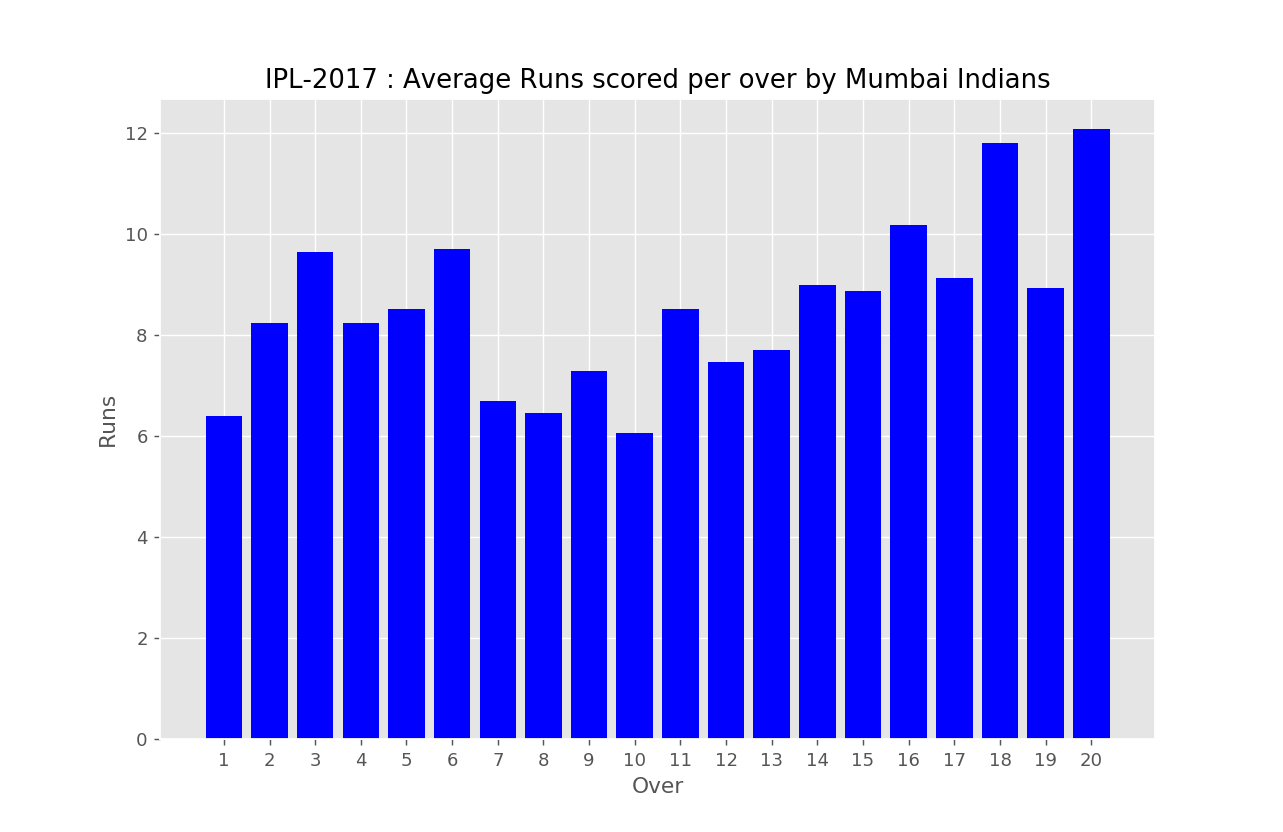

In [144]:
plt.bar(m_l, mi_runs, color ="blue")
plt.title("IPL-2017 : Average Runs scored per over by Mumbai Indians")
plt.xlabel("Over")
plt.ylabel("Runs")
plt.show()

<IPython.core.display.Javascript object>


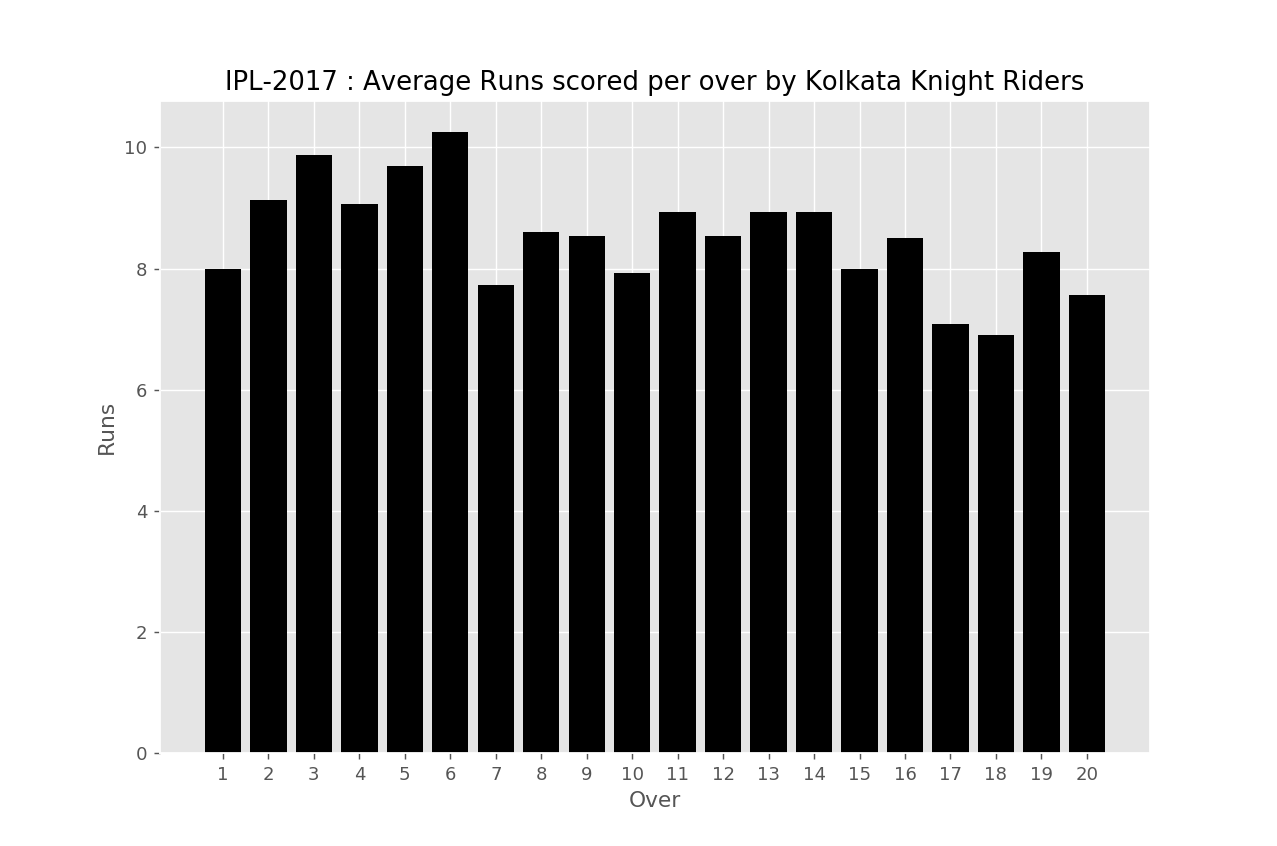

In [145]:
plt.bar(m_l, kkr_runs, color ="black")
plt.title("IPL-2017 : Average Runs scored per over by Kolkata Knight Riders")
plt.xlabel("Over")
plt.ylabel("Runs")
plt.show()

In [150]:
dw = ipl_2017[ipl_2017["batsman"]=="DA Warner"][["match_id","batsman_runs"]]

In [153]:
dw["ball"] = 1

In [157]:
dw = dw.groupby("match_id").sum()

In [159]:
dw["sr"] = (dw["batsman_runs"]/dw["ball"])*100

In [164]:
dw.shape

(14, 3)

In [167]:
gg = ipl_2017[ipl_2017["batsman"]=="G Gambhir"][["match_id","batsman_runs"]]
gg["ball"] = 1
gg = gg.groupby("match_id").sum()

In [170]:
gg["sr"] = (gg["batsman_runs"]/gg["ball"])*100

In [165]:
match_no = np.arange(1,15)
m_mo = [str(i) for i in list(match_no)]

<IPython.core.display.Javascript object>


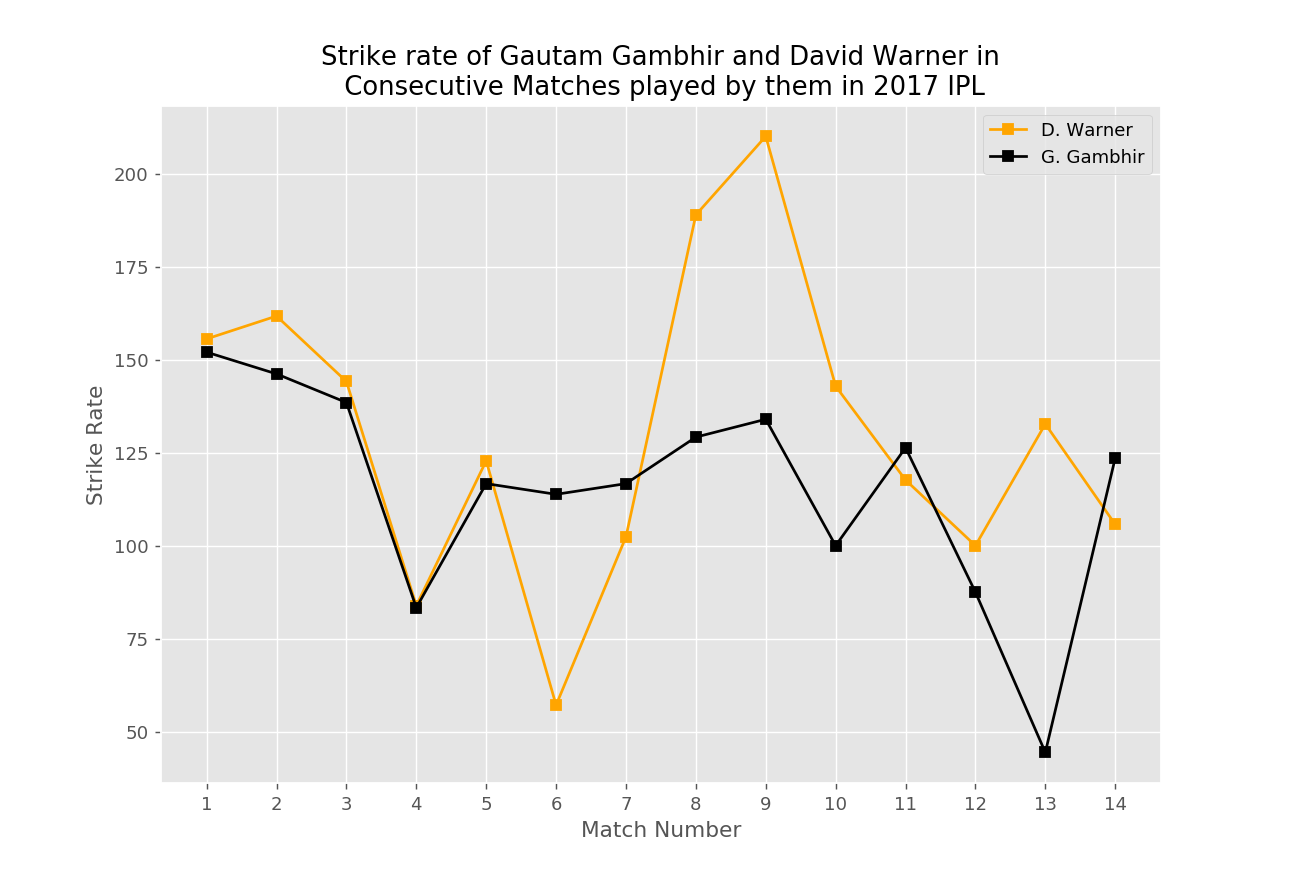

[]

In [176]:
plt.plot(m_mo,dw["sr"], color = "orange", marker = "s", label = "D. Warner")
plt.plot(m_mo,gg["sr"][:-2], color = "black", marker = "s", label = "G. Gambhir")
plt.title("Strike rate of Gautam Gambhir and David Warner in\n Consecutive Matches played by them in 2017 IPL")
plt.xlabel("Match Number")
plt.ylabel("Strike Rate")
plt.legend()
plt.plot()

In [179]:
last_bat = df[df["over"]>=16]

In [181]:
last_bat["b"] = 1

C:\Users\Sritiman Adak\python\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [185]:
last_bat=last_bat.groupby("batsman").sum()[["batsman_runs","b"]]

In [186]:
last_bat = last_bat[last_bat["batsman_runs"]>200]

In [189]:
last_bat["sr"] = (last_bat["batsman_runs"]/last_bat["b"])*100

## 10 Best batsman in the last 4 overs. 

<IPython.core.display.Javascript object>


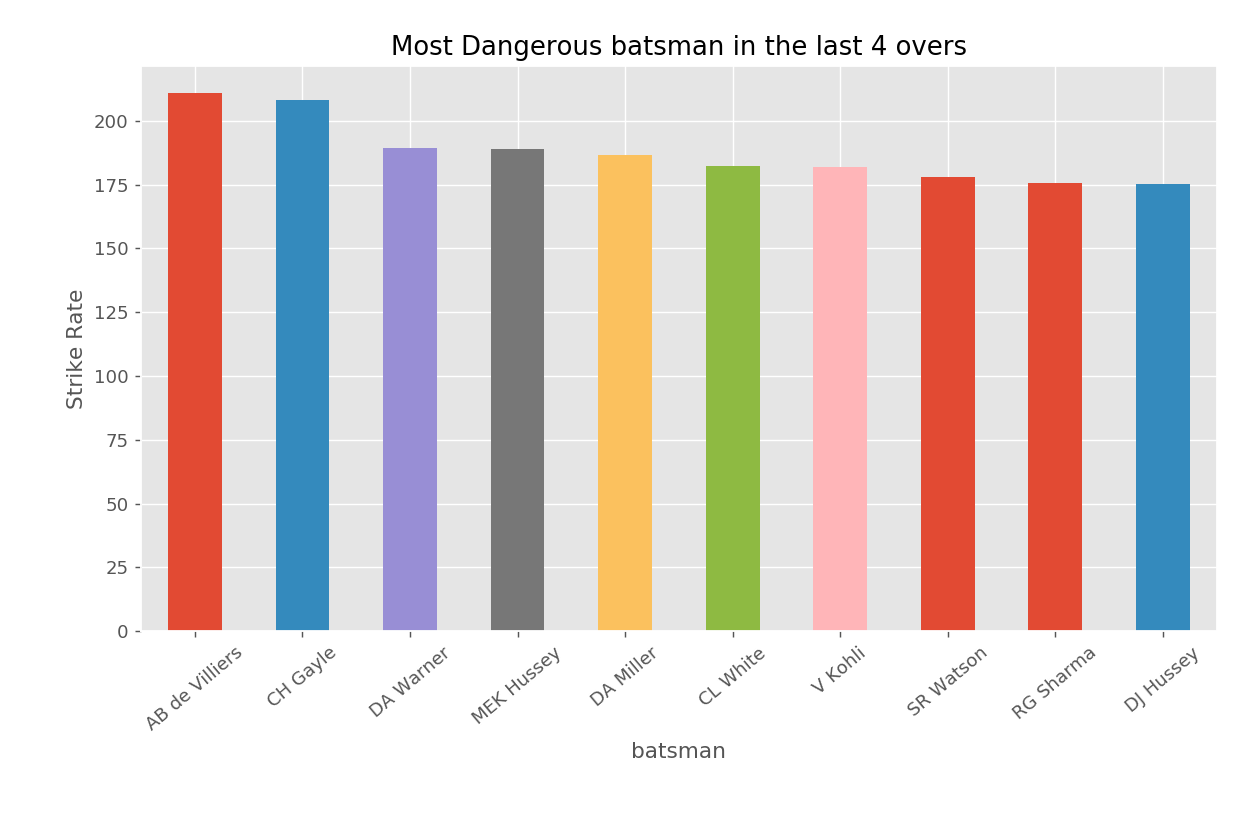

In [196]:
last_bat["sr"].sort_values(ascending = False).head(10).plot(kind = "bar")
plt.title("Most Dangerous batsman in the last 4 overs")
plt.xlabel("batsman")
plt.ylabel("Strike Rate")
plt.xticks(rotation = 40)
plt.tight_layout()
plt.show()

In [12]:
matches["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [13]:
bm = ['Mumbai Indians','Royal Challengers Bangalore']

In [14]:
bvm = matches[matches["team1"].isin(bm)]
bvm = bvm[bvm["team2"].isin(bm)]

In [22]:
bvm = bvm["winner"].value_counts()

<IPython.core.display.Javascript object>


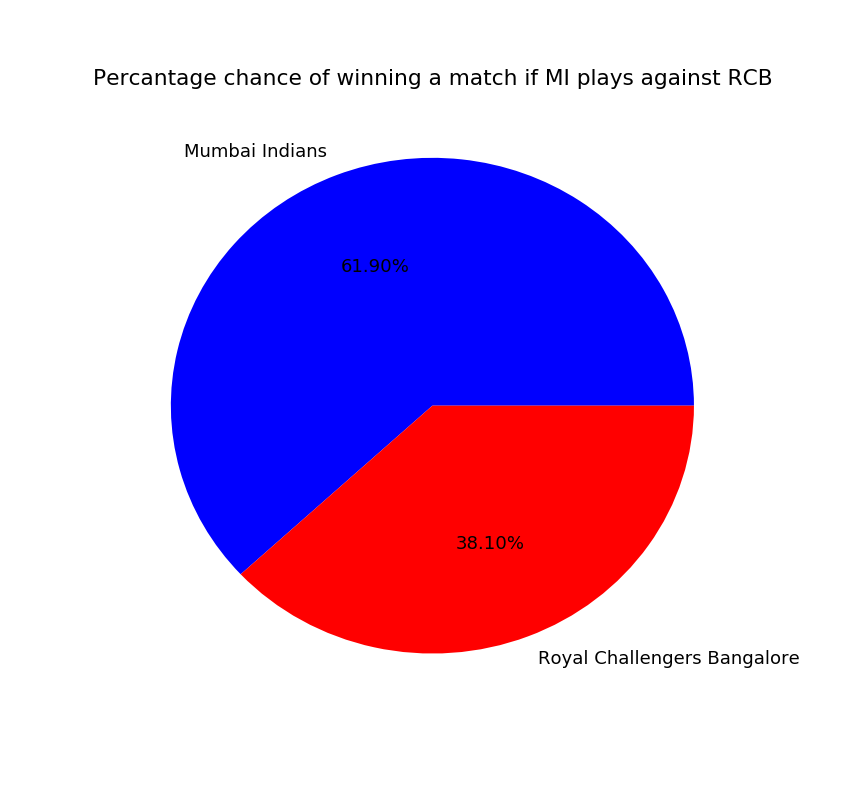

Text(0.5,1,'Percantage chance of winning a match if MI plays against RCB')

In [25]:
plt.pie(bvm.values, autopct = "%.2f%%",labels = bvm.index, colors = ["blue","red"])
plt.title("Percantage chance of winning a match if MI plays against RCB")

In [35]:
plt.style.use("ggplot")

In [32]:
%matplotlib notebook

In [33]:
sixers = df[df["batsman_runs"]>=6]

<IPython.core.display.Javascript object>


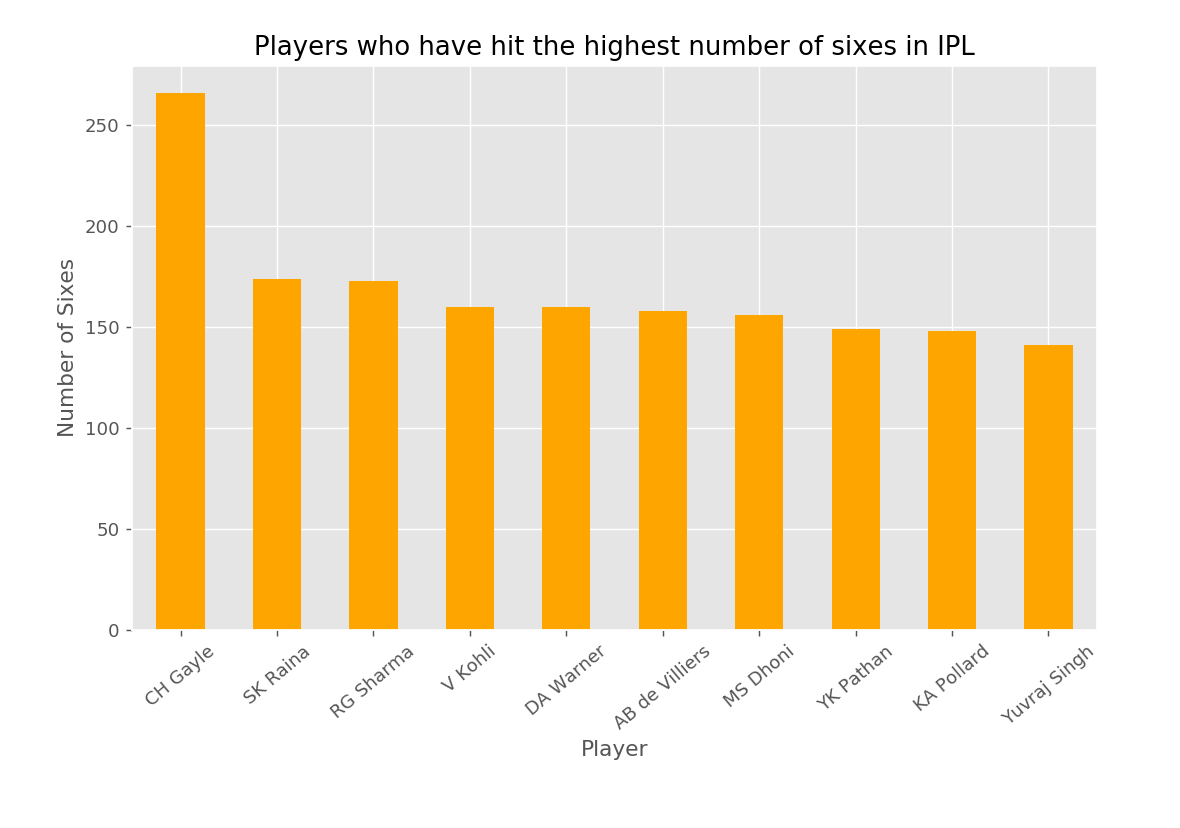

In [37]:
sixers["batsman"].value_counts().head(10).plot(kind = "bar", color ="orange")
plt.title("Players who have hit the highest number of sixes in IPL")
plt.xlabel("Player")
plt.ylabel("Number of Sixes")
plt.xticks(rotation = 40)
plt.tight_layout()
plt.show()

In [65]:
bats =df["batsman"].value_counts().head(12).index

In [66]:
bowls = df["bowler"].value_counts().head(12).index

In [67]:
print(bats)
print(bowls)

Index(['V Kohli', 'G Gambhir', 'SK Raina', 'RG Sharma', 'S Dhawan',
       'RV Uthappa', 'DA Warner', 'MS Dhoni', 'AM Rahane', 'CH Gayle',
       'AB de Villiers', 'KD Karthik'],
      dtype='object')
Index(['Harbhajan Singh', 'A Mishra', 'SL Malinga', 'P Kumar', 'PP Chawla',
       'R Ashwin', 'Z Khan', 'R Vinay Kumar', 'DW Steyn', 'IK Pathan',
       'DJ Bravo', 'B Kumar'],
      dtype='object')


In [100]:
bats = list(bats)
bowls = list(bowls)

In [101]:
game = df[df["batsman"].isin(bats)] 

In [102]:
game = game[game["bowler"].isin(bowls)]

In [103]:
game = game[["batsman", "bowler","total_runs"]]

In [104]:
game["bowl"]= 1

In [110]:
game.shape

(6630, 5)

In [109]:
game["bb"] = game["batsman"]+"00" + game["bowler"]

In [113]:
game = game.groupby("bb").sum().reset_index()

In [116]:
game["strike_rate"]= (game["total_runs"]/game["bowl"])*100

In [119]:
bb_list = list(game["bb"])

In [122]:
batsman = []
bowler = []
for i in range(len(bb_list)):
    s = bb_list[i].split("00")
    batsman.append(s[0])
    bowler.append(s[1])

In [127]:
game["batsman"]=batsman
game["bowler"] = bowler

In [151]:
game["strike_rate"] = game["strike_rate"].astype(dtype = "int32",inplace=True).values

In [152]:
game.head()

,bb,total_runs,bowl,strike_rate,batsman,bowler
0,AB de Villiers00A Mishra,13,15,86,AB de Villiers,A Mishra
1,AB de Villiers00B Kumar,51,31,164,AB de Villiers,B Kumar
2,AB de Villiers00DJ Bravo,78,44,177,AB de Villiers,DJ Bravo
3,AB de Villiers00DW Steyn,56,23,243,AB de Villiers,DW Steyn
4,AB de Villiers00Harbhajan Singh,85,68,125,AB de Villiers,Harbhajan Singh


In [153]:
piv = pd.pivot_table(game,values="strike_rate",columns = "bowler",index = "batsman")

## Strike rate of top batsman against top bowlers 

In [154]:
piv.head(12)

bowler,A Mishra,B Kumar,DJ Bravo,DW Steyn,Harbhajan Singh,IK Pathan,P Kumar,PP Chawla,R Ashwin,R Vinay Kumar,SL Malinga,Z Khan
batsman,,,,,,,,,,,,
AB de Villiers,86.0,164.0,177.0,243.0,125.0,165.0,207.0,97.0,131.0,80.0,166.0,133.0
AM Rahane,125.0,96.0,200.0,56.0,90.0,133.0,85.0,161.0,96.0,129.0,96.0,105.0
CH Gayle,184.0,151.0,141.0,120.0,104.0,176.0,125.0,184.0,84.0,0.0,80.0,92.0
DA Warner,118.0,40.0,104.0,118.0,113.0,NaN,153.0,153.0,100.0,125.0,139.0,126.0
G Gambhir,127.0,133.0,143.0,110.0,111.0,143.0,145.0,124.0,93.0,101.0,97.0,142.0
KD Karthik,150.0,96.0,121.0,93.0,69.0,129.0,136.0,119.0,116.0,117.0,105.0,125.0
MS Dhoni,109.0,195.0,175.0,181.0,120.0,190.0,154.0,156.0,NaN,133.0,132.0,181.0
RG Sharma,95.0,147.0,113.0,85.0,100.0,154.0,133.0,132.0,85.0,73.0,80.0,88.0
RV Uthappa,124.0,122.0,188.0,119.0,172.0,70.0,126.0,117.0,141.0,157.0,101.0,104.0


In [ ]:
import seaborn as sns

##  Heatmap showing the strike rate of top batsman against bowlers in IPL(Few data may
## incorrect when the batsman and bowler are from the same team.)

<IPython.core.display.Javascript object>


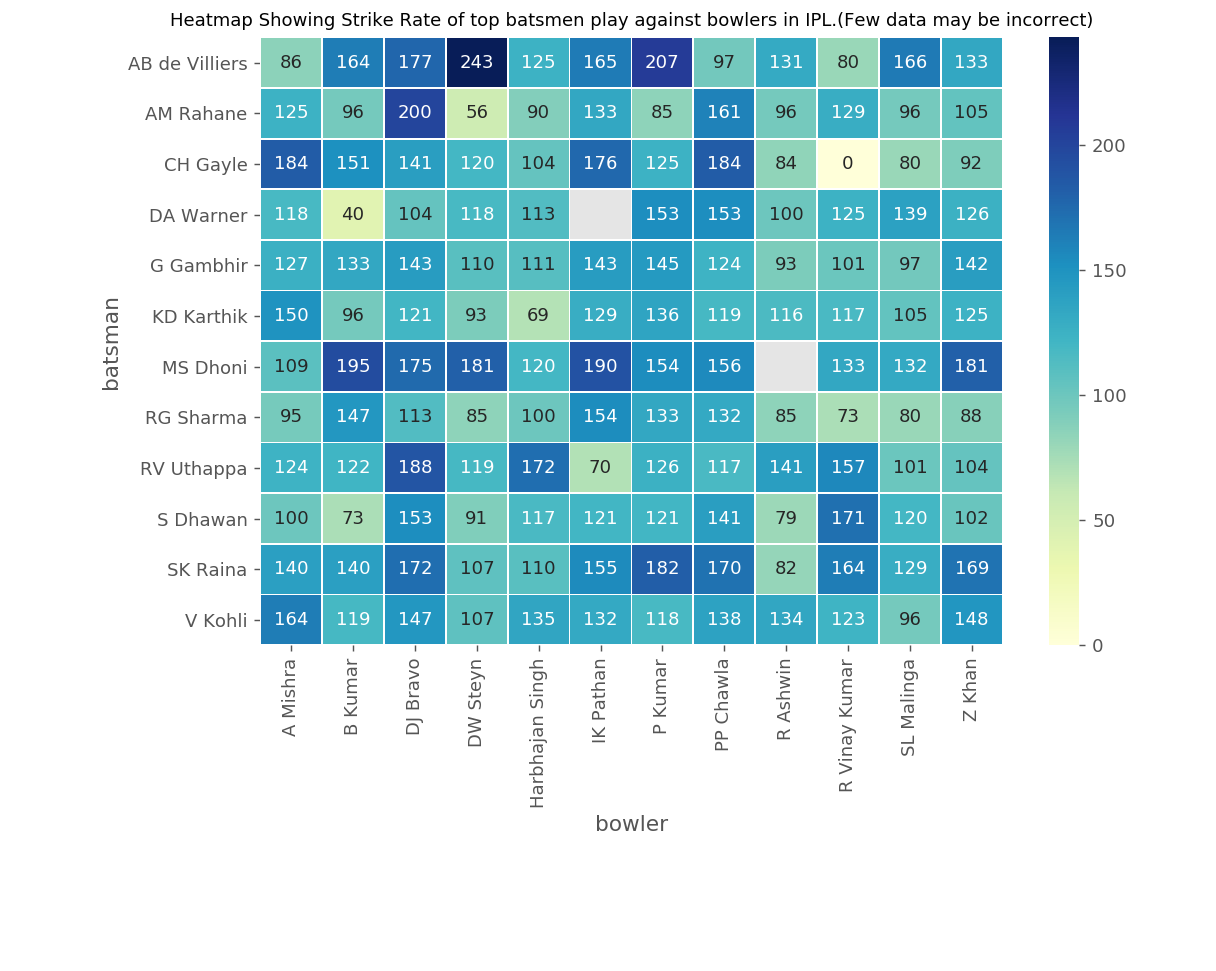

In [177]:
sns.heatmap(piv,cmap = "YlGnBu", annot = True,linewidth =0.4,fmt ="g")
plt.tight_layout()
plt.title("\n\nHeatmap Showing Strike Rate of top batsmen play against bowlers in IPL.(Few data may be incorrect)", fontsize =10)
plt.show()

In [15]:
virat = ipl_2017[ipl_2017["batsman"]=="V Kohli"]

In [25]:
%matplotlib notebook

In [28]:
v =virat.groupby("bowling_team").sum()["batsman_runs"].sort_values(ascending = False)

In [29]:
v.head()

bowling_team
Rising Pune Supergiant    83
Mumbai Indians            82
Gujarat Lions             74
Delhi Daredevils          58
Kings XI Punjab            6
Name: batsman_runs, dtype: int64

In [30]:
y = list(v.values)
x = list(v.index)

<IPython.core.display.Javascript object>


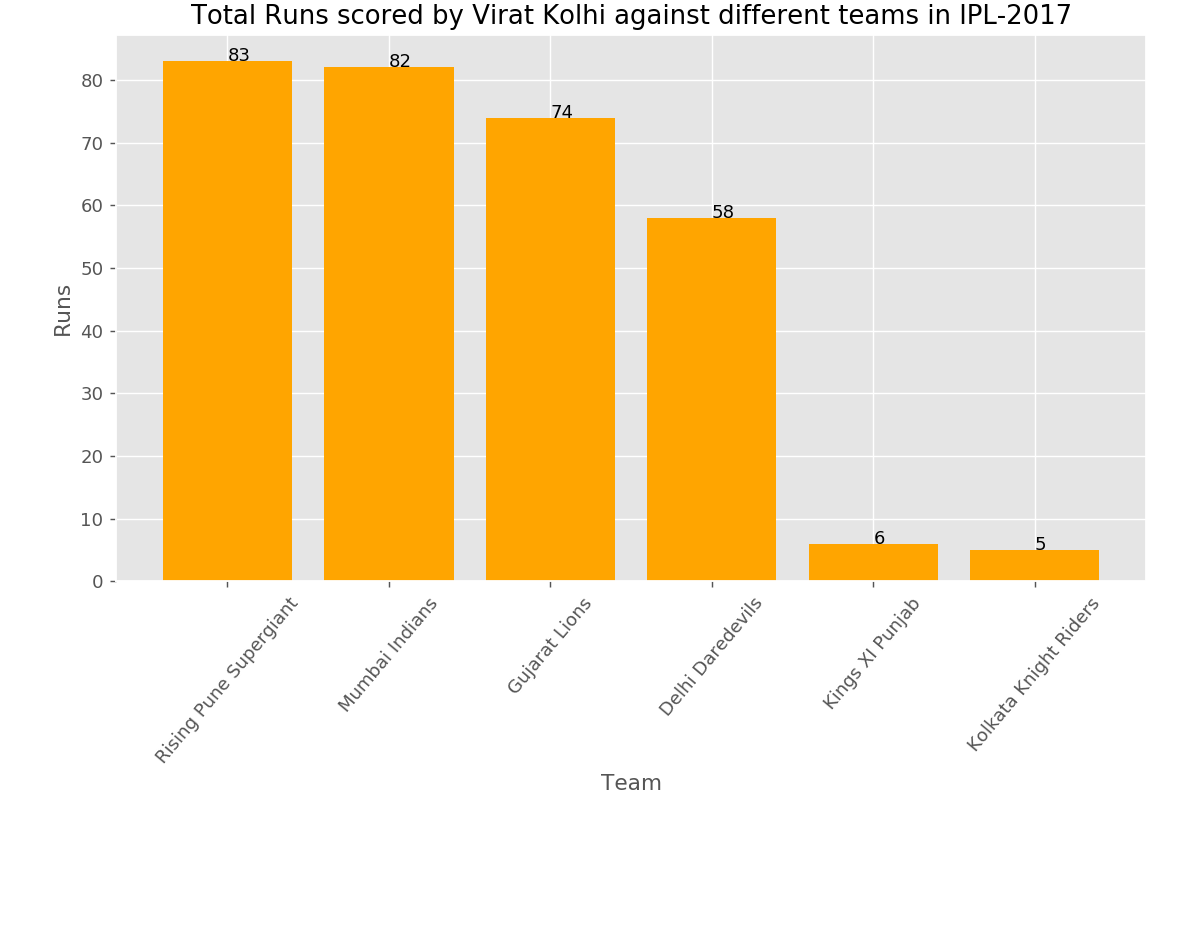

Text(0.5,1,'Total Runs scored by Virat Kolhi against different teams in IPL-2017')

In [46]:
plt.bar(x,y, color = "orange")
for i,v in enumerate(y):
    plt.text(i,v,str(v))
plt.xlabel("Team")
plt.ylabel("Runs")
plt.xticks(rotation = 50)
plt.tight_layout()
plt.title("Total Runs scored by Virat Kolhi against different teams in IPL-2017")